# In this notebook, I will explore the data set and its properties before I start to work with it.

In [1]:
import numpy as np

In [2]:
import pandas as pd

### Importing the CSV file I want to use

In [3]:
top_tracks = pd.read_csv('Database/featuresdf.csv')

In [4]:
top_tracks.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [5]:
top_tracks['danceability'].head()

0    0.825
1    0.694
2    0.660
3    0.617
4    0.609
Name: danceability, dtype: float64

### Testing to see if the column I want to predict is null

In [6]:
np.sum(top_tracks['danceability'].isna())

0

### Now that I know none of the values I want to predict are null, I will see what the range of values are

In [7]:
np.min(top_tracks['danceability'])

0.258

In [8]:
np.max(top_tracks['danceability'])

0.927

In [9]:
(frequ, bin_edges) = np.histogram(top_tracks['danceability'])

In [10]:
frequ

array([ 2,  1,  1,  5,  7, 16, 21, 29, 11,  7], dtype=int32)

In [11]:
frequ.shape

(10,)

In [12]:
bin_edges.shape

(11,)

In [13]:
import matplotlib.pyplot as plt

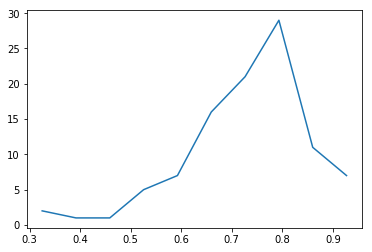

In [14]:
plt.plot(bin_edges[1:],frequ)

### There is a spike in dancability near 7.75. People just wanna DANCE!

### Creating a function that willot columns to check for correlation
#### Credit: Pluarlsight course "Understanding Machine Learning with Python" with Jerry Kurata

In [15]:
def plot_corr(df, size=11): #defining a function which takes parameters data frame, and size
    corr = df.corr() #data frame correlation function
    fig, ax=plt.subplots(figsize=(size,size)) #creating a figure
    ax.matshow(corr) # color code the rectanges by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) #draw x tick marks
    plt.yticks(range(len(corr.columns)),corr.columns) #draw y tick marks

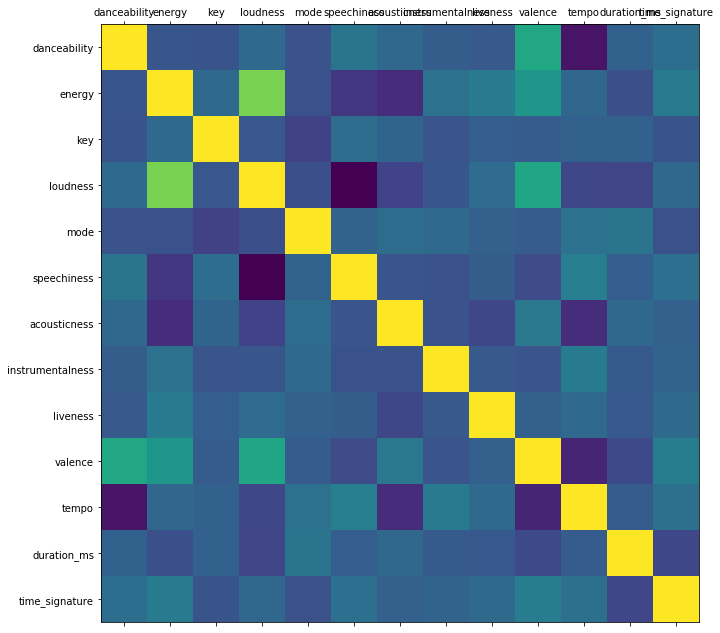

In [16]:
plot_corr(top_tracks)

In [17]:
np.corrcoef(top_tracks['loudness'],top_tracks['energy'])

array([[1.       , 0.7091414],
       [0.7091414, 1.       ]])

### So energy and loudness are relatively correlated, but I am going to leave this for now. 
### I will keep it in mind for models and results in the future though.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
top_tracks.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [26]:
top_tracks = top_tracks.drop(['id'], axis =1)

KeyError: "labels ['id'] not contained in axis"

In [25]:
top_tracks

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [27]:
top_tracks = top_tracks.drop(['name','artists'], axis =1)

In [28]:
top_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [29]:
danceability = top_tracks['danceability']

In [30]:
top_tracks = top_tracks.drop('danceability',axis = 1)

In [31]:
spotify_covariates_train, spotify_covariates_test, spotify_danceability_train, spotify_danceability_test = train_test_split(top_tracks,danceability,test_size =.3, random_state = 42)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
Lin_model = LinearRegression()

In [34]:
 Lin_model.fit(spotify_covariates_train,spotify_danceability_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
danceability_pred =Lin_model.predict(spotify_covariates_test)

In [94]:
Lin_model.score(danceability_pred,spotify_danceability_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.70379265 0.67573974 0.72367424 0.8977519  0.82919196 0.64747221
 0.72679706 0.74406741 0.60431463 0.86882293 0.79765877 0.7556724
 0.59510062 0.71612447 0.65902413 0.90397721 0.74838934 0.62376793
 0.72211656 0.6559972  0.76991503 0.58221262 0.77448229 0.8374696
 0.74902549 0.66446392 0.70640799 0.58831419 0.62839227 0.62735109].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [92]:
a = 0
for i in range(0, len(danceability_pred)):
    a = a+(danceability_pred[i]- (spotify_danceability_test.ravel())[i])**2

In [93]:
a

0.44594898213343265

In [89]:
len(danceability_pred)

30

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
import scipy as sp

In [99]:
from scipy.interpolate import CubicSpline

In [100]:
cs = CubicSpline(spotify_covariates_train,spotify_danceability_train)

ValueError: `x` must be 1-dimensional.

In [102]:
spotify_danceability_train.head()

11    0.653
47    0.852
85    0.752
28    0.748
93    0.744
Name: danceability, dtype: float64

In [103]:
spotify_covariates_train.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
11,0.658,2.0,-6.428,1.0,0.0304,0.02150,0.000002,0.0939,0.219,99.990,221507.0,4.0
47,0.773,8.0,-2.921,0.0,0.0776,0.18700,0.000030,0.1590,0.907,102.034,195840.0,4.0
85,0.505,9.0,-7.621,1.0,0.2530,0.53500,0.000003,0.1040,0.419,91.970,197437.0,4.0
28,0.524,8.0,-5.599,1.0,0.0338,0.41400,0.000000,0.1110,0.661,95.010,244960.0,4.0
93,0.739,8.0,-5.350,1.0,0.0387,0.00459,0.000000,0.3060,0.649,104.990,189467.0,4.0


In [104]:
spotify_covariates_train.shape

(70, 12)

In [105]:
lm1 = LinearRegression()

In [106]:
lm1.fit(spotify_covariates_train,spotify_danceability_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
lm2 = LinearRegression(normalize = True)

In [108]:
lm2.fit(spotify_covariates_train,spotify_danceability_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [110]:
lm1.coef_

array([-2.31935640e-01,  1.08445389e-03,  1.25582515e-02,  7.55993101e-04,
        3.11344676e-01, -3.35170333e-02,  5.28023548e-01,  8.27560235e-02,
        2.61266035e-01, -1.77160645e-03,  7.27270038e-07,  0.00000000e+00])

In [111]:
lm2.coef_

array([-2.31935640e-01,  1.08445389e-03,  1.25582515e-02,  7.55993101e-04,
        3.11344676e-01, -3.35170333e-02,  5.28023548e-01,  8.27560235e-02,
        2.61266035e-01, -1.77160645e-03,  7.27270038e-07,  0.00000000e+00])

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler = StandardScaler()

In [115]:
scaler.fit(spotify_covariates_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
spotify_covariates_train_sd = scaler.transform(spotify_covariates_train)

In [132]:
scaler2 = StandardScaler()

In [133]:
scaler2.fit(spotify_covariates_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [134]:
spotify_covariates_test_sd = scaler2.transform(spotify_covariates_test)

In [135]:
lm3 = LinearRegression()

In [136]:
lm3.fit(spotify_covariates_train_sd,spotify_danceability_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
lm3.coef_

array([-0.03199112,  0.00410575,  0.02347227,  0.00037412,  0.03154712,
       -0.00459454,  0.0162398 ,  0.0063543 ,  0.05689615, -0.04938397,
        0.02304046,  0.        ])

In [138]:
dance_lm3 = lm3.predict(spotify_covariates_test_sd)

In [139]:
mean_squared_error(dance_lm3,spotify_danceability_test)

0.013977539729905548

In [130]:
dance_lm3 = ((dance_lm3 - np.mean(dance_lm3))/np.std(dance_lm3))

In [131]:
dance_lm3

array([ 0.03270189, -0.64539237,  3.40022678,  0.82961115,  0.14521708,
       -0.88481619, -0.39430728, -1.2627961 , -1.24357116,  0.25863491,
        0.76868256,  1.30082866, -0.08907038,  0.172893  , -0.94366982,
        1.87199455, -0.70227199, -0.76897421, -0.43575397,  0.15709518,
       -0.49162549,  0.20270672, -1.58900018, -0.04421781, -0.07407809,
       -0.13735194,  1.13070764, -0.49925984,  0.59449539, -0.65963869])

In [140]:
dance_lm2 = lm2.predict(spotify_covariates_test)

In [141]:
dance_lm1 = lm1.predict(spotify_covariates_test)

In [142]:
mean_squared_error(dance_lm2,spotify_danceability_test)

0.014864966071114925

In [143]:
mean_squared_error(dance_lm1,spotify_danceability_test)

0.01486496607111442